<a href="https://colab.research.google.com/github/Roshnasviji/ML_google_colab/blob/main/apple_watch_random_forest_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import files
#files.upload()

In [ ]:
apple_data = pd.read_csv('/content/aw_fb_data.csv')
apple_data

,id,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.000000,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.000000,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.000000,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.000000,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.000000,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4684,4685,1041,19,1,183.0,65.7,2.736842,75.892958,92.500000,15.771930,6.303781,6.303781,75.666128,1.000000,0.226831,0.001810,0.068676,43.165282,fitbit,Running 7 METs
4685,4686,1042,19,1,183.0,65.7,2.615385,75.870275,6.500000,15.773279,6.303781,6.303781,75.666128,1.000000,0.204148,0.001629,0.068676,41.253192,fitbit,Running 7 METs
4686,4687,1043,19,1,183.0,65.7,2.493927,75.847592,19.000000,15.774629,6.303781,6.303781,75.666128,1.000000,0.181465,0.001448,0.068676,39.340775,fitbit,Running 7 METs
4687,4688,1044,19,1,183.0,65.7,2.372470,75.824909,20.500000,15.775978,6.303781,6.303781,75.666128,1.000000,0.158781,0.001267,0.068676,37.428030,fitbit,Running 7 METs


In [ ]:
apple_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4689 entries, 0 to 4688
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4689 non-null   int64  
 1   X1                    4689 non-null   int64  
 2   age                   4689 non-null   int64  
 3   gender                4689 non-null   int64  
 4   height                4689 non-null   float64
 5   weight                4689 non-null   float64
 6   steps                 4689 non-null   float64
 7   hear_rate             4689 non-null   float64
 8   calories              4689 non-null   float64
 9   distance              4689 non-null   float64
 10  entropy_heart         4689 non-null   float64
 11  entropy_setps         4689 non-null   float64
 12  resting_heart         4689 non-null   float64
 13  corr_heart_steps      4689 non-null   float64
 14  norm_heart            4689 non-null   float64
 15  intensity_karvonen   

In [ ]:
apple_data.head()

,id,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [ ]:
apple_data.isnull().sum()

id                      0
X1                      0
age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    1
device                  1
activity                1
dtype: int64

In [ ]:
apple_data=apple_data.dropna()

In [ ]:
apple_data.describe()

,id,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance
count,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000,4688.000000
mean,2344.500000,1547.257679,28.900811,0.511945,170.537713,70.750427,142.305500,88.825152,13.734215,4.243561,6.143837,6.037650,70.728470,0.218553,18.096682,0.152012,7.004938,140.324176
std,1353.453361,1091.528759,9.052026,0.499911,10.713992,13.795428,248.533975,25.028743,22.324147,14.668212,0.200153,0.486755,13.000577,0.770058,23.024399,0.196391,9.577712,1481.513282
min,1.000000,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,33.000000,0.056269,0.000440,5.118769,2.179799,34.153846,-1.000000,-31.531302,-0.355216,0.003231,0.000690
25%,1172.750000,592.750000,22.000000,0.000000,160.000000,61.000000,6.715771,76.000000,0.610000,0.010300,6.107633,5.958454,62.857143,-0.570441,1.295810,0.011039,0.349562,0.169762
50%,2344.500000,1312.500000,26.000000,1.000000,172.000000,71.400000,19.170334,78.522230,2.002840,0.054475,6.189825,6.149747,75.226695,0.377176,10.184882,0.085134,3.192168,6.619938
75%,3516.250000,2498.250000,32.000000,1.000000,180.000000,79.300000,134.000000,96.650291,16.304679,0.450269,6.247928,6.209453,77.039762,1.000000,24.104018,0.201281,9.568310,66.904834
max,4688.000000,3670.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,257.000000,6.409391,6.409391,130.428571,1.000000,128.500000,1.297980,56.138088,34425.000000


In [ ]:
apple_data.shape

(4688, 20)

In [ ]:
correlation = apple_data.corr()

<ipython-input-39-48e7c77d15f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = apple_data.corr()


<Axes: >

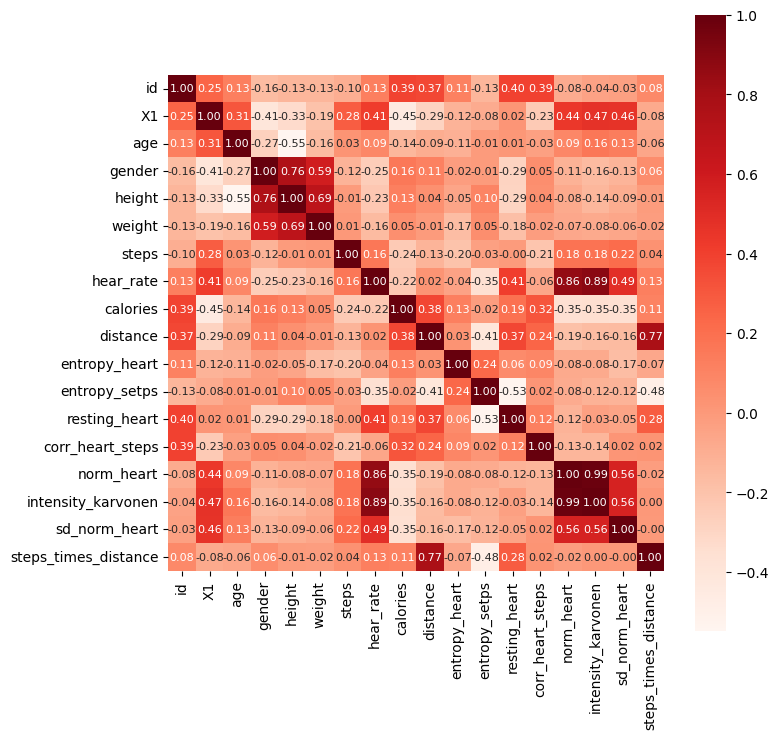

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.2f', annot = True, annot_kws = {'size':8}, cmap = 'Reds')

In [ ]:
X = apple_data.drop(['id','X1','device','activity'],axis = 1)
Y = apple_data['device']

In [ ]:
print(X)

      age  gender  height  weight      steps  hear_rate   calories   distance  \
0      20       1   168.0    65.4  10.771429  78.531302   0.344533   0.008327   
1      20       1   168.0    65.4  11.475325  78.453390   3.287625   0.008896   
2      20       1   168.0    65.4  12.179221  78.540825   9.484000   0.009466   
3      20       1   168.0    65.4  12.883117  78.628260  10.154556   0.010035   
4      20       1   168.0    65.4  13.587013  78.715695  10.825111   0.010605   
...   ...     ...     ...     ...        ...        ...        ...        ...   
4683   19       1   183.0    65.7   2.858300  75.915641  69.000000  15.770580   
4684   19       1   183.0    65.7   2.736842  75.892958  92.500000  15.771930   
4685   19       1   183.0    65.7   2.615385  75.870275   6.500000  15.773279   
4686   19       1   183.0    65.7   2.493927  75.847592  19.000000  15.774629   
4687   19       1   183.0    65.7   2.372470  75.824909  20.500000  15.775978   

      entropy_heart  entrop

In [ ]:
print(Y)

0       apple watch
1       apple watch
2       apple watch
3       apple watch
4       apple watch
           ...     
4683         fitbit
4684         fitbit
4685         fitbit
4686         fitbit
4687         fitbit
Name: device, Length: 4688, dtype: object


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify =Y, random_state = 1)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(4688, 16) (3750, 16) (938, 16)


In [ ]:
model = RandomForestClassifier(n_estimators=100)
RandomForestClassifier()

RandomForestClassifier()

In [ ]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('training data accuracy:',training_data_accuracy)

training data accuracy: 1.0


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('test data accuracy:', test_data_accuracy)

test data accuracy: 1.0


In [ ]:
X_test.to_csv('apple_test.csv',index = False)
#from google.colab import files
#files.download('apple_test.csv')

In [ ]:
input_data = (20,1,168,65.4,14.9948051948052,78.8905642895299,12.1662222222222,0.0117437922077922,6.2216117239699,6.11634856607516,59,1,19.8905642895299,0.141067831840637,0.264722010296716,0.176095876404115)
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if(prediction[0]=='apple watch'):
  print('The device is apple watch')
else:
  print('The device is fitbit')

The device is apple watch


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


SVM

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
print(standardised_data)

[[-0.98339979  0.9763879  -0.23688501 ... -0.06870671 -0.62703692
  -0.09466634]
 [-0.98339979  0.9763879  -0.23688501 ... -0.07152062 -0.62703692
  -0.09465797]
 [-0.98339979  0.9763879  -0.23688501 ... -0.06836278 -0.62703692
  -0.09464906]
 ...
 [-1.09388408  0.9763879   1.16330274 ... -0.76581469 -0.72428593
  -0.06687861]
 [-1.09388408  0.9763879   1.16330274 ... -0.76673632 -0.72428593
  -0.0681696 ]
 [-1.09388408  0.9763879   1.16330274 ... -0.76765795 -0.72428593
  -0.06946082]]


In [ ]:
X1 = standardised_data
Y1 = apple_data['device']

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1,test_size=0.2,random_state=2)

In [ ]:
classifier = svm.SVC(kernel ='linear')
classifier.fit(X1_train,Y1_train)

SVC(kernel='linear')

In [ ]:
X1_train_prediction = classifier.predict(X1_train)
training_data_accuracy = accuracy_score(Y1_train, X1_train_prediction)
print('Accuracy of training data:',training_data_accuracy)

Accuracy of training data: 1.0


In [ ]:
X1_test_prediction = classifier.predict(X1_test)
test_data_accuracy = accuracy_score(Y1_test, X1_test_prediction)
print('Accuracy of test data:',test_data_accuracy)

Accuracy of test data: 1.0


In [ ]:
input_data1 = (20,1,180.0,79.3,10.4310924369748,82.609564484127,15.621125,0.0084958907563025,6.24792751344359,6.16898014502253,75.0,-1.0,7.60956448412696,0.0608765158730157,0.89881730768172,0.0886214218134313)
input_data1_as_numpy_array = np.array(input_data1)
input_data1_reshaped = input_data1_as_numpy_array.reshape(1,-1)
prediction1 = classifier.predict(input_data1_reshaped)
if(prediction1[0]=='apple watch'):
  print('The device is apple watch')
else:
  print('The device is fitbit')

The device is fitbit
